In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import pickle

In [2]:
M_sun = 1.98992e+33 # gram
UnitMass_in_g = 1.0 * M_sun       # !!!!!!!!!!!!!!!!!!!!!!!!! CHANGE !!!!!!!!!!!!!!!!!
UnitRadius_in_cm = 9.2e+16  #!!!!!!!!!!!!!! CHANGE !!!!!!!!!!!!!!!!!!
UnitDensity_in_cgs = UnitMass_in_g / UnitRadius_in_cm**3

print(f'UnitDensity_in_cgs = {UnitDensity_in_cgs} g/cm^3')

UnitDensity_in_cgs = 2.555477932111449e-18 g/cm^3


In [3]:
filz = np.sort(glob.glob('/mnt/Linux_Shared_Folder_2022/Outputs_103k/*.pkl'))

In [4]:
j = 1375

with open(filz[j], 'rb') as f:
    data = pickle.load(f)


r = data['pos']
h = data['h']
print(r.shape)

print('h = ', np.sort(h))

x = r[:, 0]
y = r[:, 1]
z = r[:, 2]
t = data['current_t']
rho = data['rho']
unitTime_in_kyr = data['unitTime_in_kyr']

print('rho = ', np.sort(rho)*UnitDensity_in_cgs)

(103964, 3)
h =  [7.57370603e-04 7.59649552e-04 7.59922322e-04 ... 7.68794839e-01
 7.72202329e-01 7.76437628e-01]
rho =  [3.31772479e-23 3.42379631e-23 3.42985840e-23 ... 9.95500735e-14
 1.00122564e-13 1.01934205e-13]


In [5]:
R = (x*x + y*y + z*z)**0.5 * UnitRadius_in_cm
np.sort(R)

array([2.96435593e+13, 3.63674199e+13, 4.22602227e+13, ...,
       3.87076053e+17, 3.87903469e+17, 3.91561653e+17])

In [6]:
#rho = rho * UnitDensity_in_cgs

In [7]:
radius = (x*x + y*y + z*z)**0.5

logR = np.log10(radius)
rgrid = np.logspace(min(logR), max(logR), 40)

res = []

for i in range(len(rgrid)-1):
    
    nx = np.where((radius > rgrid[i]) & (radius <= rgrid[i+1]))[0]
    
    res.append([rgrid[i], np.mean(rho[nx])])

res = np.array(res)

R = res[:, 0] * UnitRadius_in_cm
rho = res[:, 1] * UnitDensity_in_cgs

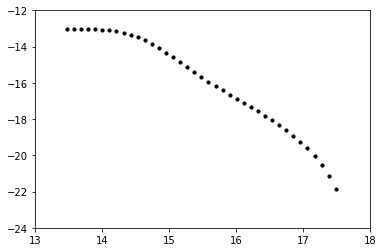

In [11]:
plt.scatter(np.log10(R), np.log10(rho), s = 10, color = 'k')
plt.xlim(13, 18)
plt.ylim(-24, -12);